### Phương pháp Hồi quy tuyến tính

In [113]:
# Hàm tính toán các chỉ số đánh giá trên các tập dữ liệu
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae

In [114]:
# Khởi tạo mô hình hồi quy tuyến tính
lr_model = LinearRegression()

# Huấn luyện mô hình trên dữ liệu train
lr_model.fit(X_train, y_train)

# Dự đoán trên tập train, validation, và test
y_train_pred = lr_model.predict(X_train)
y_validation_pred = lr_model.predict(X_validation)
y_test_pred = lr_model.predict(X_test)

joblib.dump(lr_model, '../Data/linear_regression_model.pkl')

# Đánh giá trên tập train
r2_train, mse_train, rmse_train, mae_train = evaluate_model(y_train, y_train_pred)

# Đánh giá trên tập validation
r2_val, mse_val, rmse_val, mae_val = evaluate_model(y_validation, y_validation_pred)

# Đánh giá trên tập test
r2_test, mse_test, rmse_test, mae_test = evaluate_model(y_test, y_test_pred)

# Tạo DataFrame để hiển thị kết quảa
results = {
    'Metric': ['LinearRegression-R²', 'LinearRegression-MSE', 'LinearRegression-RMSE', 'LinearRegression-MAE'],
    'Train': [r2_train, mse_train, rmse_train, mae_train],
    'Validation': [r2_val, mse_val, rmse_val, mae_val],
    'Test': [r2_test, mse_test, rmse_test, mae_test]
}

results_df = pd.DataFrame(results)

# Hiển thị DataFrame
results_df

,Metric,Train,Validation,Test
0,LinearRegression-R²,0.891182,0.890579,0.877382
1,LinearRegression-MSE,0.000211,0.000215,0.000242
2,LinearRegression-RMSE,0.014512,0.014668,0.015558
3,LinearRegression-MAE,0.011478,0.011591,0.012114


In [115]:
print('intercept b is: {}'.format(lr_model.intercept_))
print('coeff a is: {}'.format(lr_model.coef_))

intercept b is: 0.02390222447997791
coeff a is: [2.46395783e-10 2.98382756e-11]


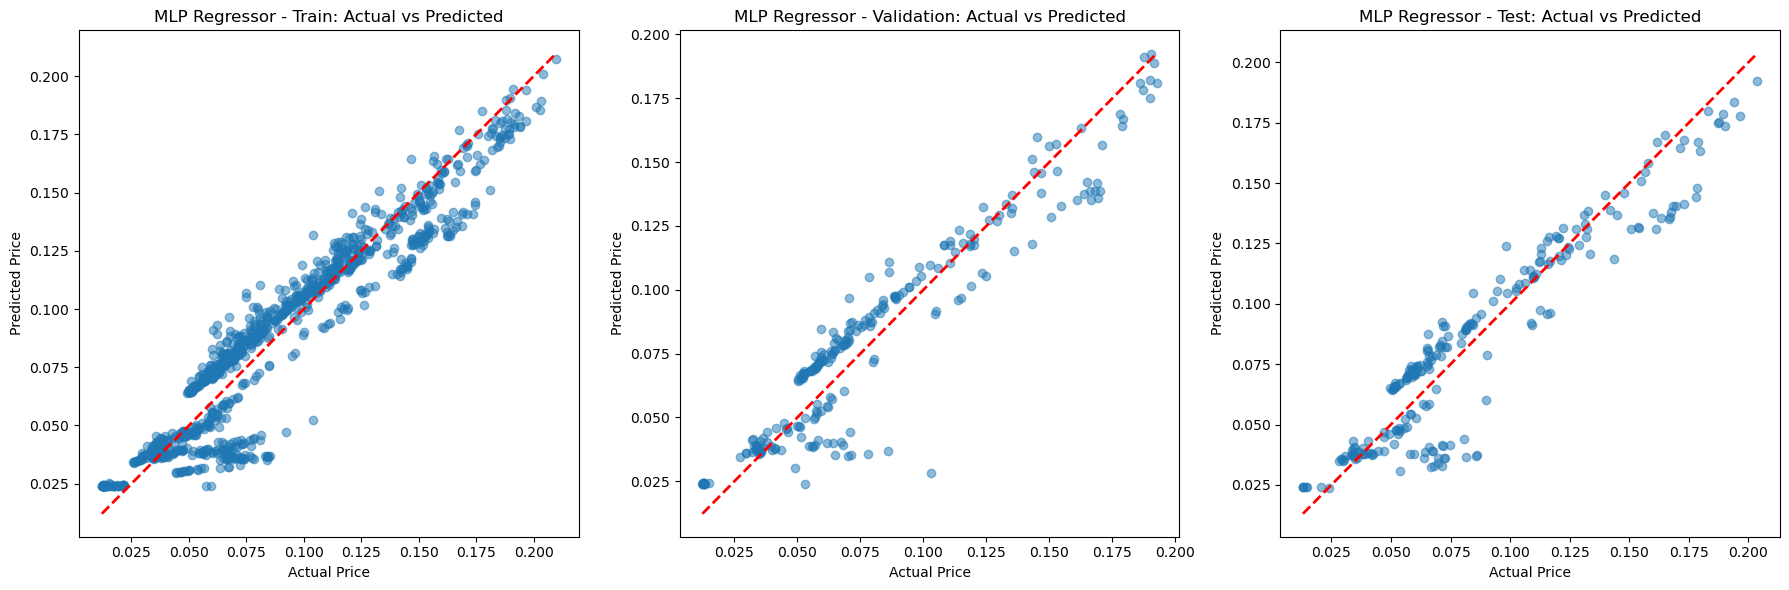

In [116]:
# Vẽ biểu đồ phân tán cho tập train, validation và test
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(18, 6))

# Tập train
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('MLP Regressor - Train: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Tập validation
plt.subplot(1, 3, 2)
plt.scatter(y_validation, y_validation_pred, alpha=0.5)
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'r--', lw=2)
plt.title('MLP Regressor - Validation: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Tập test
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('MLP Regressor - Test: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Tinh chỉnh và hiển thị
plt.tight_layout()
plt.show()
